# Customer Sentiment Using TensorFlow

Modification of Naive Bayes Customer Sentiment predictor using TensorFlow

Requirements:

    * sckikit-learn
    * imbalanced-learn
    * pandas
    * Numpy
    * nltk

In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np

In [1]:
import pandas as pd

In [2]:
from nltk.tokenize import word_tokenize

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.metrics import classification_report

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
pip install numpy==1.23.5

Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf

2025-02-09 22:46:34.024112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from tensorflow.keras import Sequential

In [10]:
from tensorflow.keras.layers import Dense

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
import re

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.metrics import classification_report

In [46]:
import seaborn as sns

In [52]:
import matplotlib.pyplot as plt

### Quick view of the raw data:

reviews = pd.read_csv('iphone.csv')
reviews.head()

### Clean and prepare the data

In [17]:
column_name_mapping = {'productAsin':'Product_Number','country':'Country','date':'Date',
                       'isVerified':'Verified','ratingScore':'Rating_Score','reviewTitle':'Review_Title',
                       'reviewDescription':'Review_Description','reviewUrl':'Review_Url',
                       'reviewedIn':'Reviewer_Location','variant':'Product_Type','variantAsin':'Product_Type_Number'}

reviews.rename(columns=column_name_mapping, inplace=True)

In [18]:
emojis = (r'[\U0001F600-\U0001F64F' 
        r'\U0001F300-\U0001F5FF'  
        r'\U0001F680-\U0001F6FF'  
        r'\U0001F700-\U0001F77F'  
        r'\U0001F780-\U0001F7FF'  
        r'\U0001F800-\U0001F8FF'  
        r'\U0001F900-\U0001F9FF'  
        r'\U0001FA00-\U0001FA6F'  
        r'\U0001FA70-\U0001FAFF'  
        r'\U00002764\ufe0f'  
        r']+')

# Removes emoji characters from Review_Description column
reviews['Review_Description'] = reviews['Review_Description'].apply(lambda x: re.sub(emojis, '', str(x)) if isinstance(x, str) else x)

# Asigns rating score a category of High, Low, and Neutral
reviews['Rating_Category'] = np.where(reviews['Rating_Score'] >= 4, 'High', np.where(reviews['Rating_Score'] <=2, 'Low', 'Neutral'))

In [19]:
# Asigns rating category a number
rating_mapping = {'High':1,'Low':2,'Neutral':3}
reviews['Numerical_Rating_Category'] = reviews['Rating_Category'].map(rating_mapping)




### Train the model:

In [20]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, ngram_range=(1,2))

reviews = reviews.dropna(subset=['Review_Description']) # Remove rows with missing values in Review_Description

X = vectorizer.fit_transform(reviews['Review_Description'])

y = reviews['Numerical_Rating_Category']

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [21]:
x_train_dense = X_train.toarray()
x_test_dense = X_test.toarray()

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train) # Converts labels to numbers
y_test_encoded = label_encoder.fit_transform(y_test)

In [26]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train_dense.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
history = model.fit(x_train_dense, y_train_encoded,
                   epochs=20,
                   batch_size=32,
                   validation_data=(x_test_dense, y_test_encoded))

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6059 - loss: 1.0745 - val_accuracy: 0.6741 - val_loss: 0.9702
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6750 - loss: 0.9109 - val_accuracy: 0.6741 - val_loss: 0.7901
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6615 - loss: 0.7043 - val_accuracy: 0.7021 - val_loss: 0.6712
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8319 - loss: 0.4774 - val_accuracy: 0.8175 - val_loss: 0.5535
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9154 - loss: 0.2712 - val_accuracy: 0.8242 - val_loss: 0.4989
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9376 - loss: 0.2019 - val_accuracy: 0.8287 - val_loss: 0.4804
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9728 - loss: 0.1458 - val_accuracy: 0.8298 - val_loss: 0.4724
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9845 - loss: 0.1189 - val_accuracy: 0.8365 - v

In [29]:
loss, accuracy = model.evaluate(x_test_dense, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8436 - loss: 0.4733
Test Loss: 0.5358
Test Accuracy: 0.8309


### Prediction:

In [30]:
def predict_customer_sentiment(review_text):
    review_tfidf = vectorizer.transform([review_text])
    
    sentiment_labels = {1:'Positive', 2:'Negative', 3:'Neutral'}
    
    sentiment_probs = model.predict(review_tfidf.toarray())
    sentiment_class = sentiment_probs.argmax(axis=1)[0]
    
    sentiment_class += 1
    
    return sentiment_labels[sentiment_class]

In [31]:
testreview1 = "I absolutely love my new iPhone!"

In [32]:
testreview2 = "I am extremely disappointed with the iPhone. The battery life is bad."

In [33]:
testreview3 = "The phone is ok."

### Testing:

In [35]:
print(predict_customer_sentiment(testreview1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Positive


In [36]:
print(predict_customer_sentiment(testreview2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Negative


In [37]:
predict_customer_sentiment(testreview3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


'Positive'

### Reviewing the model:

In [38]:
y_pred_probs = model.predict(x_test_dense)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [39]:
y_pred = y_pred_probs.argmax(axis=1) + 1

In [51]:
# Print the classification report
print(classification_report(y_test, y_pred, target_names=['High', 'Negative', 'Neutral']))


              precision    recall  f1-score   support

        High       0.84      0.96      0.89       602
    Negative       0.82      0.68      0.75       222
     Neutral       0.80      0.17      0.29        69

    accuracy                           0.83       893
   macro avg       0.82      0.61      0.64       893
weighted avg       0.83      0.83      0.81       893



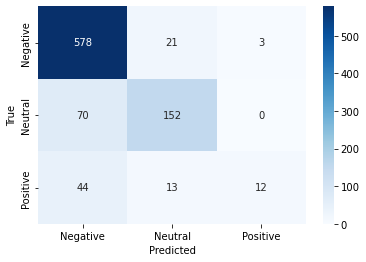

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
def confidence_scores(review_text):
    review_tfidf = vectorizer.transform([review_text])
    
    sentiment_labels = {1:'Positive', 2:'Negative', 3:'Neutral'}
    
    sentiment_probs = model.predict(review_tfidf.toarray())
    sentiment_class = sentiment_probs.argmax(axis=1)[0]
    
    sentiment_class += 1
    
    
    confidence = sentiment_probs[0][sentiment_class - 1]
    return sentiment_labels[sentiment_class], confidence

In [54]:
print(confidence_scores(testreview1))
print(confidence_scores(testreview2))
print(confidence_scores(testreview3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
('Positive', 0.99970144)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
('Negative', 0.63984394)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
('Positive', 0.8664421)
